# Projet de mathématiques (UE11.2) – Équations Différentielles
### 10 janvier 2021
<br>LEBŒUF Antoine<br>HERNOT Anatole

<br><br>

## Préambule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable


#   Données

alpha = 10  # Valeurs arbitraires
beta = 2
gamma = 10
delta = 2

#   Fonctions préalables

def prey(x1, x2):
    global alpha, beta
    return x1*(alpha - beta*x2)

def predator(x1, x2):
    global gamma, delta
    return -x2*(gamma - delta*x1)

<br><br>

## Question 1


Donner une interprétation physique à chaque terme de la dynamique. 
Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. Que peut-on dire de leur stabilité à ce stade ?

Pour comprendre la signification de chaque coefficient il suffit de développer les expressions afin de faire apparaître leurs différentes contributions. Sachant que $x_1$ représente l'effectif de proies et $x_2$ celui des prédateurs, on a :

$$
\left\{
\begin{matrix} \dot{x_1} = \alpha x_1 - \beta x_1 x_2 \\
\dot{x_2} = - \gamma x_2 + \delta x_1 x_2 \end{matrix}
\right.
$$

* $\alpha$ représente la reproduction des proies (augmentation)
* $\beta$ représente les proies mangées par les prédateurs, c'est un facteur de chasse (diminution)
* $\gamma$ représente la compétition entre les prédateurs (diminution)
* $\delta$ représente la prolifération des prédateurs grâce à l'abondance de proies (augmentation)

Soit $( x_1^\mathrm{eq}, x_2^\mathrm{eq} ) \in \mathbb{R}^2$ :

$$
\left\{
    \begin{matrix} \dot{x_1^\mathrm{eq}} = 0 \\
    \dot{x_2^\mathrm{eq}} = 0 \end{matrix}
\right.
\iff
\left\{
    \begin{matrix} 0 = x_1^\mathrm{eq} (\alpha - \beta x_2^\mathrm{eq}) \\
    0 = - x_2^\mathrm{eq} (\gamma - \delta x_1^\mathrm{eq}) \end{matrix}
\right.
\iff
\left\{
    \begin{matrix} x_1^\mathrm{eq} = 0 \\
    x_2^\mathrm{eq} = 0 \end{matrix}
\right.
\ \mathrm{ou} \ 
\left\{
    \begin{matrix} x_1^\mathrm{eq} = \frac{\gamma}{\delta} \\
    x_2^\mathrm{eq} = \frac{\alpha}{\beta} \end{matrix}
\right.
$$

Or $\alpha$, $\beta$, $\gamma$ et $\delta$ sont strictement positifs donc on a bien deux points d'équilibre : l'un en $(0,0)$ et l'autre $\bar{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Ensuite pour étudier leur stabilité on utilise le lien entre la stabilité et la stabilité du linéarisé tangent. On pose :

$$
\begin{matrix} f &:& \mathbb{R}^2 &\longrightarrow& \mathbb{R} \\
                    &&  (x_1, x_2) &\longmapsto& (x_1(\alpha - \beta x_2), - x_2(\gamma - \delta x_1))
  \end{matrix}
$$
  
La jacobienne de $f$ existe et est définie pour $(x_1, x_2) \in \mathbb{R}^2$ :

$$
J_{f}(x_1, x_2) = \left ( \begin{matrix} \alpha - \beta x_2 && - \beta x_1 \\
                                           \delta x_2 && \gamma - \delta x_1
                    \end{matrix} \right )
$$

On recherche les valeurs propres de cette matrice pour chacun des points d'équilibre sachant que, dans le cas général, le polynôme caractéristique est : 
$\chi(x_1, x_2) = (X - \alpha + \beta x_2)(X - \gamma + \delta x_1) + \beta \delta x_1 x_2$

Ainsi, en $(0,0)$ : $S_{p}(J_{f}(0,0)) = \{ \alpha, \gamma \}$
Ces valeurs propres sont à partie réelle strictement positives donc $(0,0)$ est instable.

Et, en $\bar{x}$ : $S_{p}(J_{f}(\bar{x})) = \{ + i\sqrt{ \gamma \alpha }, - i\sqrt{ \gamma \alpha } \}$
Ces valeurs propres sont à parties réelles nulles (purement imaginaires) donc on ne peut rien dire de la stabilité de $\bar{x}$ pour le moment.

<br><br>

## Question 2


À l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs.
Intuiter le comportement des solutions.
On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

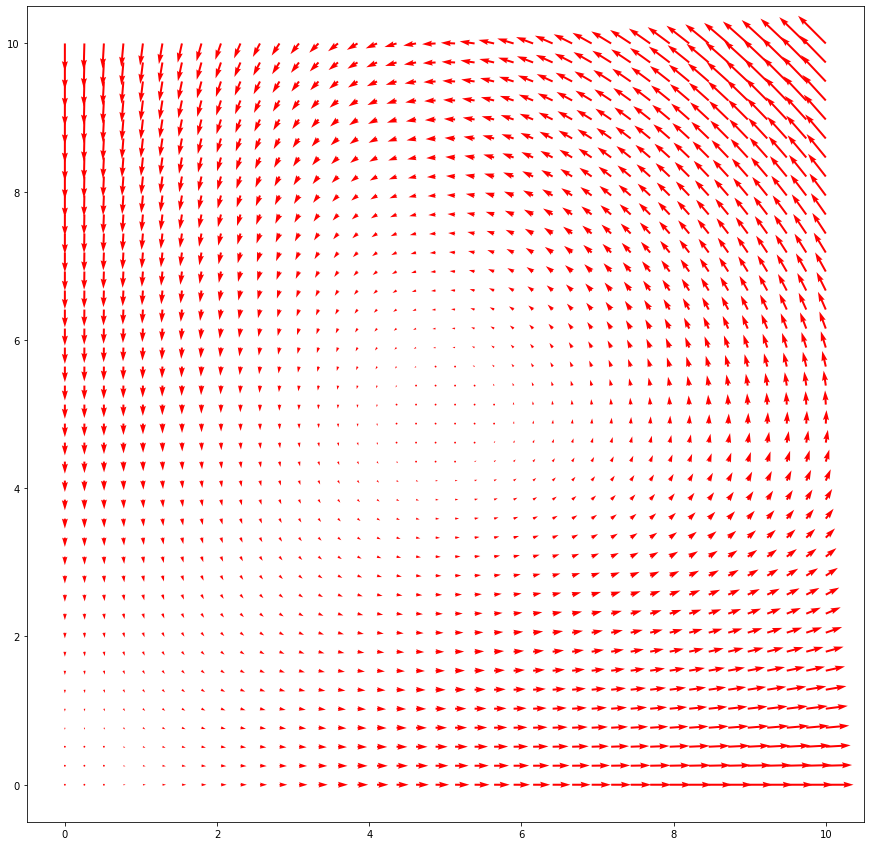

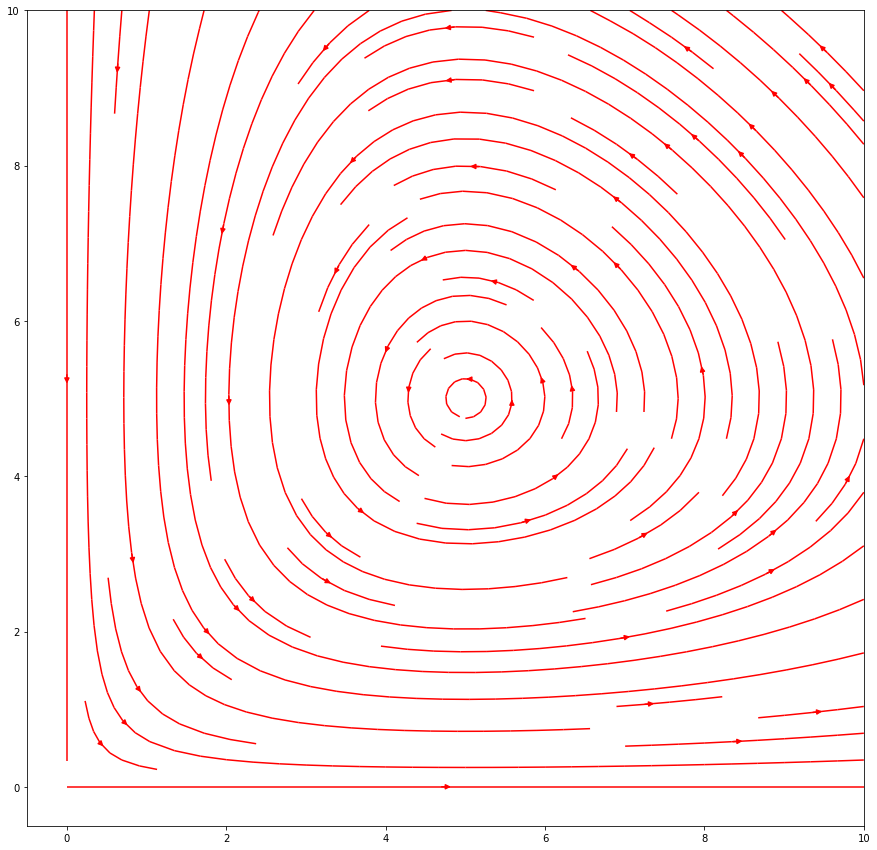

In [2]:
xMin, xMax = (0, 10)
yMin, yMax = (0, 10)
N = 40 # Nombre de points par ligne/colonne
listeX = np.linspace(xMin, xMax, N)
listeY = np.linspace(yMin, yMax, N)

gridX, gridY = np.meshgrid(listeX, listeY)

gridXp = prey(gridX, gridY)
gridYp = predator(gridX, gridY)

plt.figure("Champ de vecteurs 1", figsize=(15, 15))
plt.quiver(gridX, gridY, gridXp, gridYp, color = 'r')
plt.show()

plt.figure("Champ de vecteurs 2", figsize=(15, 15))
plt.streamplot(gridX, gridY, gridXp, gridYp, color = 'r')
plt.show()

Grâce à ces champs de vecteurs on peut supposer qualitativement que le point $\bar{x}$ est stable, au contraire du point $(0,0)$. En effet, le champ de vecteurs "tourne" autour du point $\bar{x}$ donc les solutions semblent piégées dans ce tourbillon, ce qui n'est pas le cas du point $(0, 0)$. Par contre, il est difficile de s'exprimer sur l'attractivité car on ne sait pas à quel point les solutions vont tourner autour de $\bar{x}$ (spirale, "patate" etc.).

<br><br>

## Question 3


Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans  $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ sur son ensemble de définition.

Comme $J_{f}$ est touours définie et continue, on peut appliquer le théorème de Chauchy-Lipschitz pour n'importe quelles conditions initiales, on aura systématiquement l'unicité de la solution maximale.
Pour établir le résultat on va raisonner par l'absurde.

Soit $(x_{10}, x_{20}) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Il existe une unique solution (d'après le théorème ci-dessus) que l'on notera $x(t)$ quivérifie ces conditions initiales $( x(0) = (x_10, x_20) )$. Si la solution sort du domaine $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ alors elle va nécessairement croiser l'axe des abscisses ou des ordonnées puisqu'elle est continue.

Supposons qu'elle croise l'axe des ordonnées (le raisonnement est le même pour l'axe des abscisses). Alors il existe un temps $t_{f}$ tel que $x(t_f) = (0,x_2(t_f))$. Dans ce cas, comme $\dot{x_1} = x_1(\alpha - \beta x_2)$, on a $\dot{x_1} = 0$ et $\dot{x_2} = - \gamma x_2$. Ainsi, la solution est "piégée" sur l'axe des ordonnées.

Toutefois, on remarque que $x_\mathrm{ord}(t) = (0, x_2(t))$ est aussi une solution maximale de l'équation et que pour $t = t_f$ on a $x_\mathrm{ord}(t_f) = (0, x_2(t_f)) = x(t_f)$. Dès lors, si on applique de nouveau le théorème de Cauchy-Lipschitz pour les conditions initiales $(t_f, (0, x_2(t_f))$ on devrait avoir $x(t) = x_\mathrm{ord}(t)$ or ce n'est clairement pas le cas, il y a absurdité.

Le raisonnement est le même si la solution croise l'axe des abscisses ou si elle atteint le point $(0,0)$. De ce fait, toute solution intialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans ce domaine.

<br><br>

## Question 4


On considère la fonction
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$
définie sur $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$.
Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$ et que $\bar{x}$ est stable.

Soit $t \in \mathbb{R}$ et $x(t) = (x_1(t), x_2(t)$ une solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ :

$$
\begin{matrix}
\frac{\mathrm{d}H}{\mathrm{d}t}(x_1(t), x_2(t)) &=& \frac{\partial H}{\partial x_1}(x_1(t), x_2(t)) \frac{\mathrm{d}x_1}{\mathrm{d}t}(t) + \frac{\partial H}{\partial x_2}(x_1(t), x_2(t)) \frac{\mathrm{d}x_2}{\mathrm{d}t}(t) \\
&=& (\delta - \frac{\gamma}{x_1}) \dot{x_1} + (\beta - \frac{\alpha}{x_2}) \dot{x_2} \\
&=& (\delta x_1 - \gamma)(\alpha - \beta x_2) - (\delta x_1 - \gamma)(\alpha - \beta x_2) \\
&=& 0
\end{matrix}
$$

Donc $\forall t \in \mathbb{R}, \ \frac{\mathrm{d}H}{\mathrm{d}t}(x_1(t), x_2(t)) = 0$ : il y a conservation de la quantité $H$.

Soit $x(t)$ une solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ en $(t_0, x_0)$. $H$ est correctement définie en $x(t_0)$ et est constante sur tout son domaine de défnition $\mathbb{R}$ c'est pourquoi les coordonnées $(x_1(t), x_2(t))$ ne peuvent pas exploser ni s'approcher des axes (sinon $H$ divergerait). En d'autres termes, $x(t)$ ne peut pas tendre vers la frontière de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Par conséquent, on peut appliquer la contraposée du théorème maximal d'existence et donc les solutions sont définies pour tout temps $t \in \mathbb{R}$.

Ensuite pour démontrer que $\bar{x}$ est stable on montre que $H$ est en réalité une fonction de Lyapunov.

- $f$ est continue et $\bar{x}$ est un point d'équilibre dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$

- On remarque qu'on peut poser $u : x_1 \longmapsto \delta x_1 - \gamma \ln(x_1)$ et $v : x_2 \longmapsto \beta x_2 - \alpha \ln(x_2)$ deux fonctions non liées de sorte que $H(x_1, x_2) = u(x_1) + v(x_2)$. Ces deux fonctions sont bien $C^1$ avec, pour $(x_1, x_2) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ :

$$\frac{\mathrm{d}u}{\mathrm{d}x_1} = \delta - \frac{\gamma}{x_1}$$
$$\frac{\mathrm{d}v}{\mathrm{d}x_2} = \beta - \frac{\alpha}{x_2}$$

Ainsi on en déduit les tableaux suivants :

$$
\begin{array}{|c||lcccr|}
\hline
x_1
& 0^{+} & & \frac{\gamma}{\delta} & & +\infty\\
\hline
\mathrm{signe\ de\ }u' & - & & 0 & & + \\
\hline
& +\infty & & & & +\infty\\
\mathrm{variations\ de\ }u
& & \searrow & & \nearrow & \\
& & & 0 & & \\
\hline
\end{array}
$$

$$
\begin{array}{|c||lcccr|}
\hline
x_2
& 0^{+} & & \frac{\alpha}{\beta} & & +\infty\\
\hline
\mathrm{signe\ de\ }v' & - & & 0 & & + \\
\hline
& +\infty & & & & +\infty\\
\mathrm{variations\ de\ }u
& & \searrow & & \nearrow & \\
& & & 0 & & \\
\hline
\end{array}
$$

Dès lors, on note que $\bar{x}$ est un minimum pour chacune des fonctions $u$ et $v$. C'est donc un minimum global pour la foncction $H$ et donc $\forall x \in (\mathbb{R}_{>0} \times \mathbb{R}_{>0}) \backslash \{ \bar{x} \}, H(x) > 0$

Ainsi $H$ est une fonction de Lyapunov, elle va donc nous permettre détudier la stabilité de $\bar{x}$.

Pour cela on calcule pour $(x_1, x_2) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ :

$\left \{ \begin{matrix}
\nabla{H}(x_1, x_2) &=& (\delta - \frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2}) \\
f(x_1, x_2) &=& (x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1))
\end{matrix} \right.$
donc
$\langle \nabla{H}(x_1, x_2), f(x_1, x_2) \rangle = (\delta x_1 - \gamma)(\alpha - \beta x_2) - (\delta x_1 - \gamma)(\alpha - \beta x_2) = 0$

Ainsi : $\forall x \in \mathbb{R}_{>0} \times \mathbb{R}_{>0},\langle \nabla{H}(x), f(x) \rangle \leq 0$.
Par conséquent, $\bar{x}$ est stable.

<br><br>

## Question 5


Représenter les courbes de niveau de $H$. Qu'en conclue-t-on sur le comportement des solutions ?

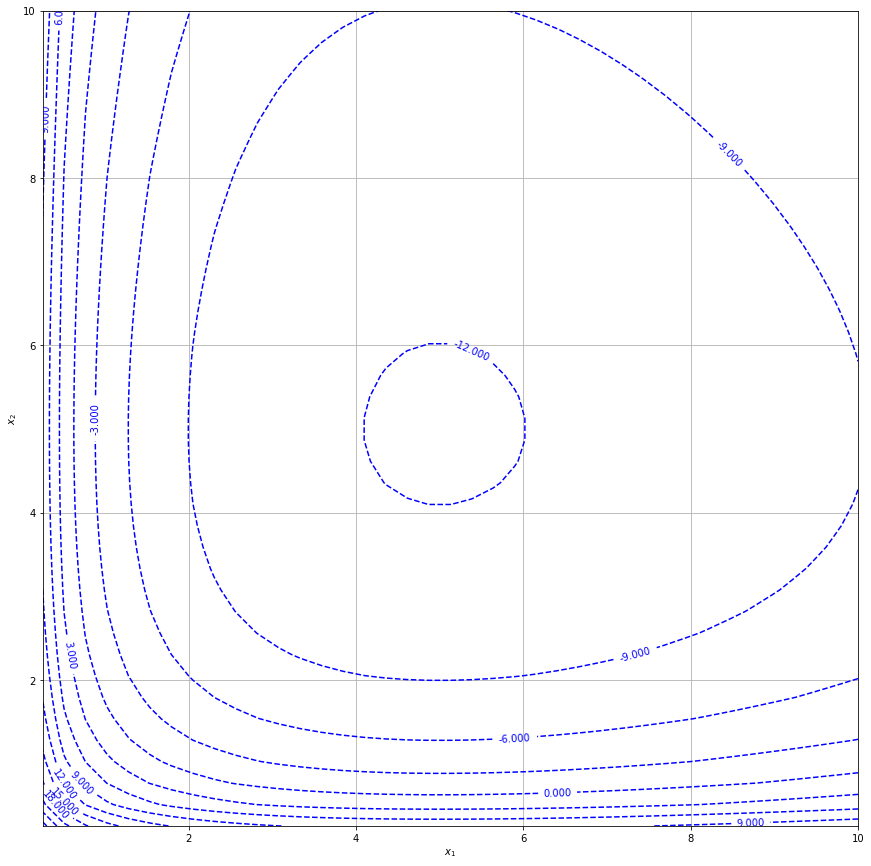

In [3]:
def H(x1, x2):
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots(figsize=(15, 15))
    contour_set = plt.contour(
        X, Y, Z, colors="blue", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H, listeX[1:], listeY[1:], levels = 15) # On reste sur le domaine sans coordonées nulles
plt.show()

On remarque que la fonction $H$ forme une "cuvette" (fonction convexe) avec son minimum en $\bar{x}$ donc les solutions sont piégées dans cette convexité. Cependant, comme $H$ est constante le long des solutions, ces dernières sont forcées de rester sur une même courbe de niveau. Ainsi, elle ne peuvent "tomber" vers $\bar{x}$ donc ce point est stable mais pas attractif.

<br><br>

On souhaite maintenant simuler numériquement les trajectoires.

## Question 6


Créer une fonction `solve_euler_explicit` prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$.
<br><br>La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0.
Comment visualiser graphiquement l'ordre de convergence ?

### 6.1. Théorie


Pour une fonction $x$ vérifiant $\dot{x}(t) = f(t, x(t))$ :
$$
x(t) = x(t_0) + \int_{t_0}^{t} {f(t', x(t')) \,\mathrm{d}t'}
$$


<br>Discrétisation de l'échelle des temps :
$$
x(t_{i+1}) = x(t_{i})
+
\underbrace{
    \int_{t_{i}}^{t_{i+1}} {f(t, x(t)) \,\mathrm{d}t}
}
_{=\phi_i}
$$


<br>&nbsp;&nbsp;&nbsp;&nbsp;Méthode d'Euler explicite (avec approximation par des rectangles à gauche) :
$\phi_i \approx (t_{i+1} - t_{i}) f(t_{i}, x(t_{i}))$.

<br><br>
D'où :
$$
x(t_{i+1}) = x(t_{i}) + (t_{i+1} - t_{i}) f(t_{i}, x(t_{i}))
$$


### 6.2. Fonction `solve_euler_explicit`

In [4]:
def solve_euler_explicit(f: Callable, x0: float or np.ndarray, dt: float, t0: float, tf: float):
    """
    This function applies an explicit Euler scheme to numerically calculate the points of a function x defined by its first
    derivative function f, using a set time step, on a set time interval.
    
    :param f: The derivative function of x, as f(t, x)
    :param x0: The initialisation point (= x(t0))
    :param dt: The calculation time step
    :param t0: The initial time (left bound of the time interval)
    :param tf: The final time (right bound of the time interval)
    
    :return: The array of time points and the array of values of the x function
    """

    # Initialise the array for time
    time_array = np.arange(t0, tf, dt)

    # Initialise the array for points
    if type(x0) is np.ndarray:
        points_array_shape = (time_array.shape[0], *np.array(x0.shape).tolist() )
        points_array = np.empty(points_array_shape)
    else:
        points_array = np.empty_like(time_array)

    # Get the number of time points
    time_len = time_array.shape[0]

    # Fill the initial value
    points_array[0] = x0


    for time_index in range(1, time_len):
        # Get the previous point
        x_previous = points_array[time_index - 1]
        
        # Calculate the time delta between both calculations
        time_previous = time_array[time_index - 1]
        time_current = time_array[time_index]
        time_delta = time_current - time_previous
        
        # Calculate the approximation function for the integral (rectangle approximation on the left)
        gradient_diff = time_delta * f(time_previous, x_previous)

        # Calculate x_current
        x_current = x_previous + gradient_diff

        # Add to the points array
        points_array[time_index] = x_current

    return time_array, points_array

### 6.3. Test de la fonction `solve_euler_explicit`

Test de la fonction sur l'équation
$$
\frac{\mathrm{d}x}{\mathrm{d}t}(t) + x(t) = 0
$$

D'ensemble de solutions
$$
\left\{
t \mapsto A e^{-t}
\mid
A \in \mathbb{R}
\right\}
$$


<br><br>La solution au problème de Cauchy (paramètre initial fixé à $x(0)=x_0$) est :

$$
x : t \mapsto x_0 e^{-t}
$$


<br><br>Sur les graphes ci-dessous sont représentées :
* La solution théorique (mathématique), en rouge
* La solution calculée à l'aide de la fonction `solve_euler_explicit`, en bleu
* La différence entre ces deux solutions, en gris

In [5]:
# Define derivative function
def sample_f(t, x):
    return -1 * x

# Solve equation using explicit scheme
time_array, points_array_explicit_sample = solve_euler_explicit(f=sample_f, x0=1, dt=0.05, t0=0, tf=1)  # compute ~20 points

# Compute mathematical solution = exp(-t)
points_array_theory_sample = 1 * np.exp(-1 * time_array)

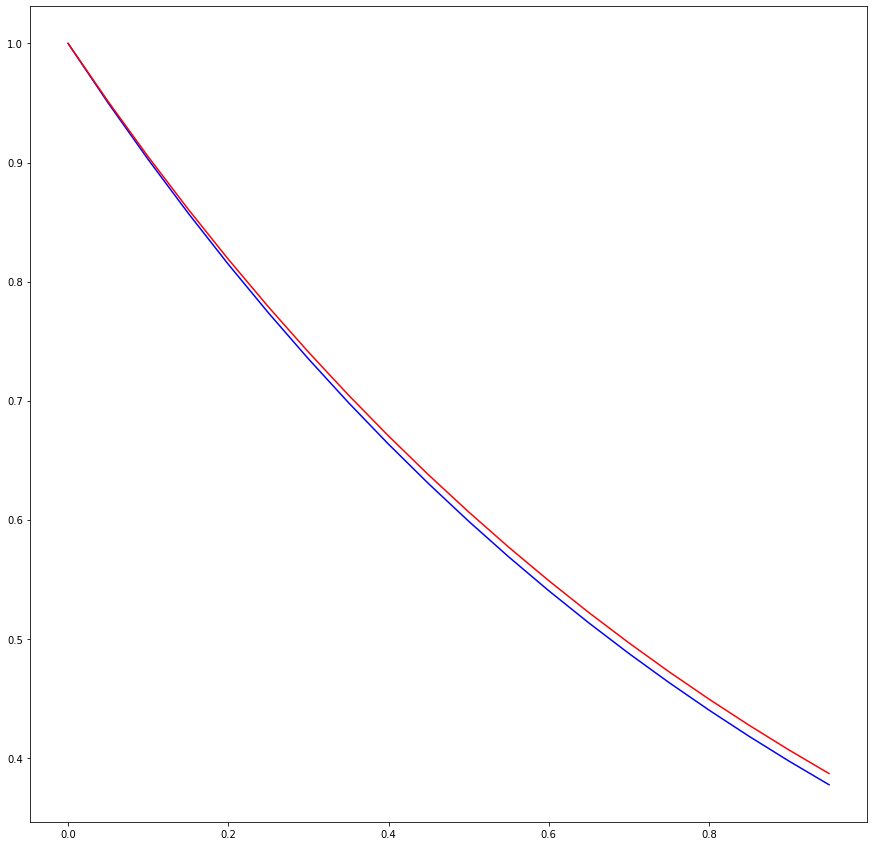

In [6]:
# Compare both solutions
plt.figure(figsize=(15,15))
plt.plot(time_array, points_array_explicit_sample, c='blue')  # solution computed using scheme
plt.plot(time_array, points_array_theory_sample, c='red')  # mathematical solution
plt.show()

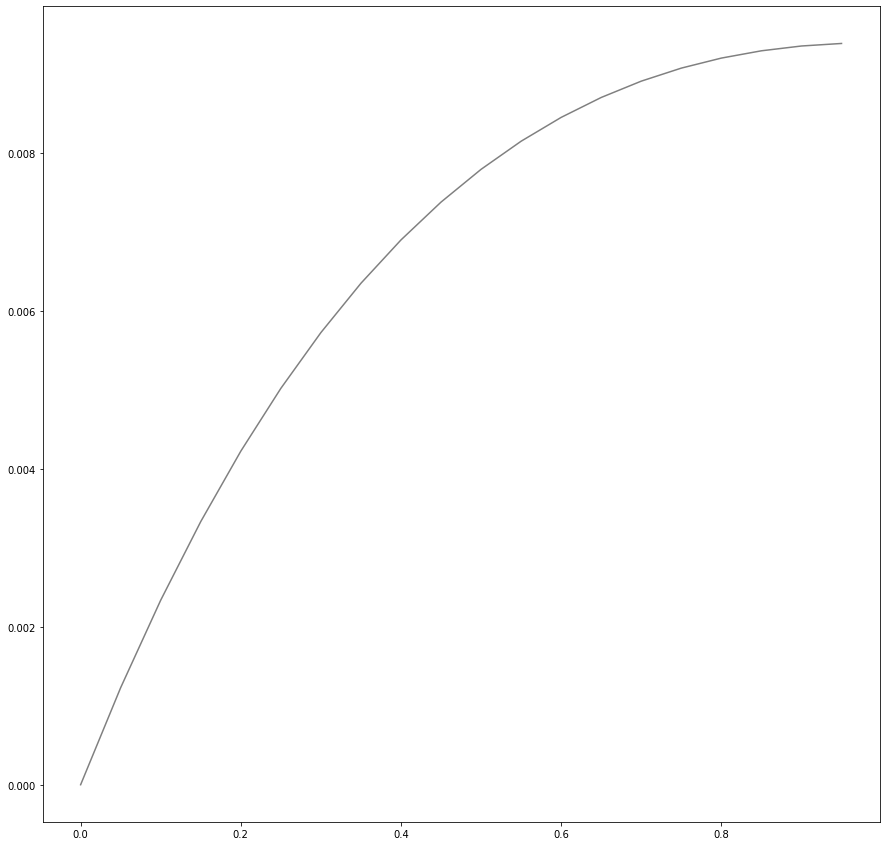

In [7]:
# Compute difference array
diff_array_explicit = np.abs(points_array_explicit_sample - points_array_theory_sample)

# Plot difference
plt.figure(figsize=(15,15))
plt.plot(time_array, diff_array_explicit, c='grey')
plt.show()

<br><br>

## Question 7
Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra.
Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ?
On pourra tracer l'évolution de la fonction $H$.

### 7.1. Théorie

On a :

$$
\begin{pmatrix}
\dot{x_1}
\\
\dot{x_2}
\end{pmatrix}
=
\begin{pmatrix}
\alpha & - \beta x_1
\\
\delta x_2 & - \gamma 
\end{pmatrix}
\begin{pmatrix}
x_1
\\
x_2
\end{pmatrix}
$$

Initialisation :

$$
X_0
=
\begin{pmatrix}
x_1 (0)
\\
x_2 (0)
\end{pmatrix}
=
\begin{pmatrix}
10
\\
10
\end{pmatrix}
$$


<br><br>Sur le graphe ci-dessous sont représentés :
* Le nombre de proies, en bleu
* Le nombre de prédateurs, en rouge

On observe une remontée brusque du nombre de proies, ce qui mène à une remontée du nombre de prédateurs et une auto-régulation du système.

### 7.2. Simulation

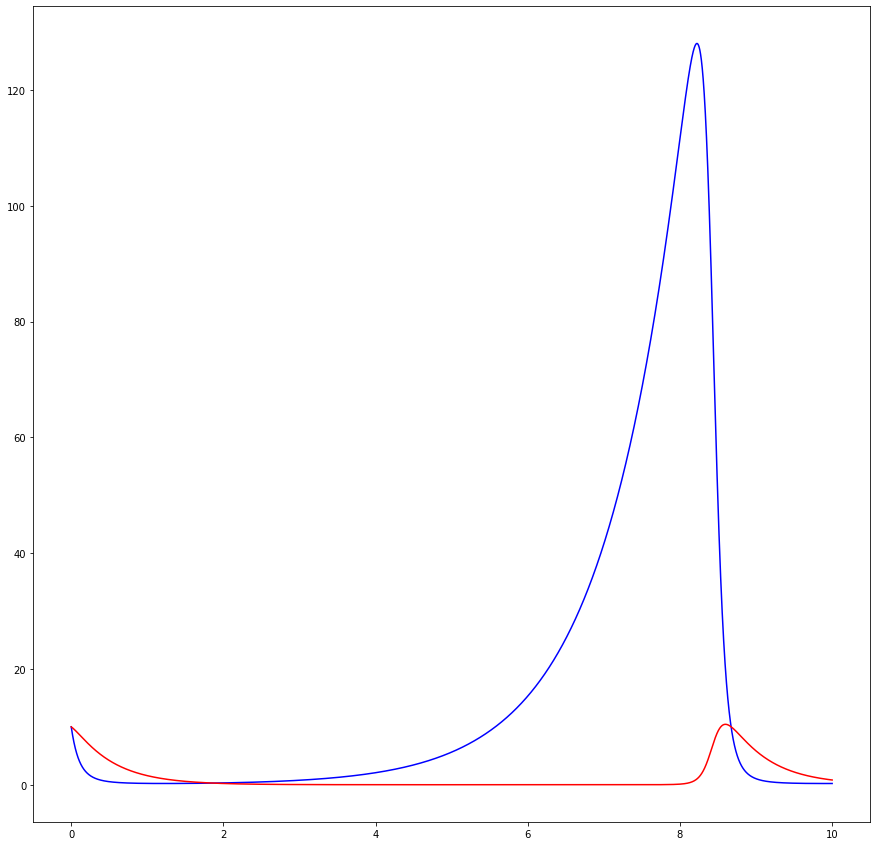

In [8]:
# Initialise simulation parameters
alpha = 1
beta = 1
delta = 0.1
gamma = 2

# Define derivative function
def lv(t, X):
    x1, x2 = X
    x1_der = alpha * x1 - beta * x1 * x2
    x2_der = delta * x1 * x2 - gamma * x2
    return np.array([x1_der, x2_der])

# Initialise function values
x10 = 10
x20 = 10
X0 = np.array([x10, x20])


# Solve equation using explicit scheme
time_array, points_array = solve_euler_explicit(f=lv, x0=X0, dt=0.0001, t0=0, tf=10)

# Unpack solution
x1_array = points_array[:, 0]
x2_array = points_array[:, 1]

# Plot solution
plt.figure(figsize=(15,15))
plt.plot(time_array, x1_array, c='blue')  # prey
plt.plot(time_array, x2_array, c='red')  # predators
plt.show()

### 7.3. Simulation en temps long

En temps long, on observe une certaine cyclicité de la solution.
<br>Les nombres de prédateurs et de proies atteignent souvent 0 avant de ré-augmenter, ce qui n'est pas réaliste.

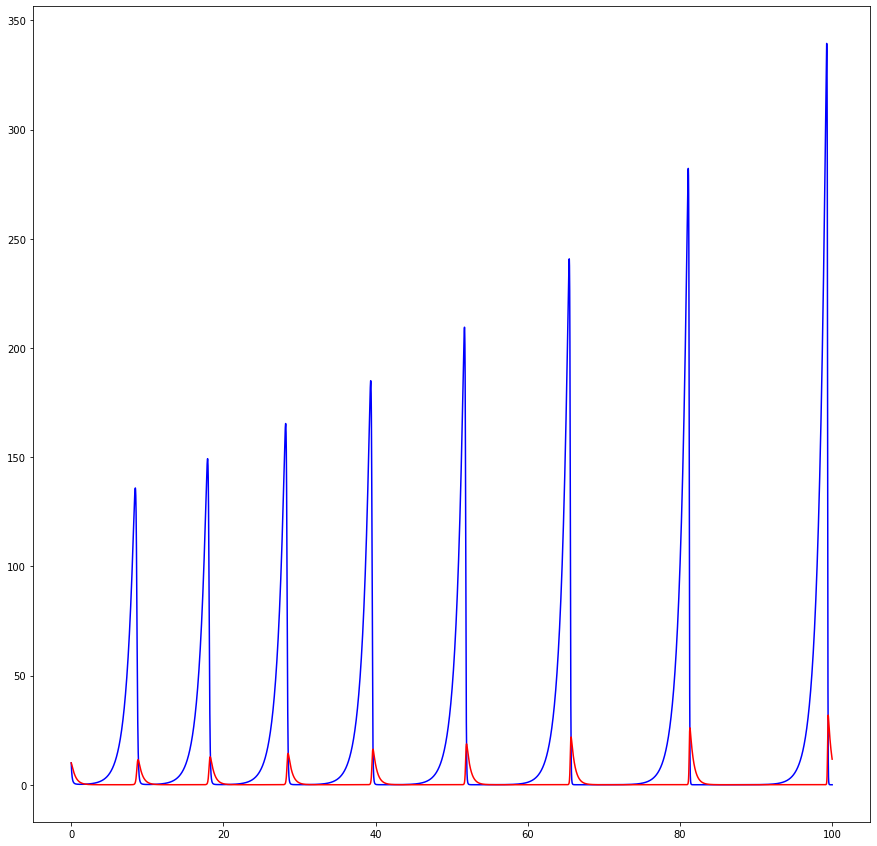

In [9]:
# Initialise simulation parameters
alpha = 1
beta = 1
delta = 0.1
gamma = 2

# Define derivative function
def lv(t, X):
    x1, x2 = X
    x1_der = alpha * x1 - beta * x1 * x2
    x2_der = delta * x1 * x2 - gamma * x2
    return np.array([x1_der, x2_der])

# Initialise function values
x10 = 10
x20 = 10
X0 = np.array([x10, x20])


# Solve equation using explicit scheme
time_array, points_array = solve_euler_explicit(f=lv, x0=X0, dt=0.01, t0=0, tf=100)

# Unpack solution
x1_array = points_array[:, 0]
x2_array = points_array[:, 1]

# Plot solution
plt.figure(figsize=(15,15))
plt.plot(time_array, x1_array, c='blue')  # prey
plt.plot(time_array, x2_array, c='red')  # predators
plt.show()

### 7.4. Évolution de la fonction $H$ (en temps long)

On a

$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$

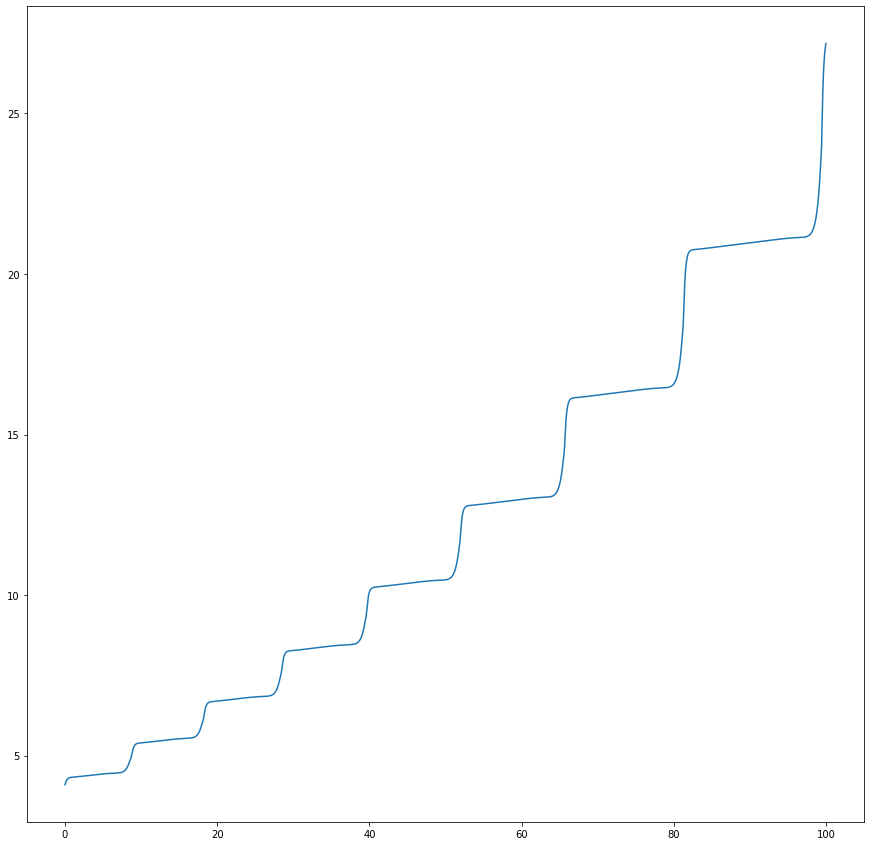

In [10]:
# Compute H array
H_array = delta * x1_array - gamma * np.log(x1_array) + beta * x2_array - alpha * np.log(x2_array)

# Plot H array
plt.figure(figsize=(15, 15))
plt.plot(time_array, H_array)
plt.show()

<br><br>

## Question 8


Coder maintenant une fonction du type :

```{.python}
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    # ...
    return t, x
```
donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

### 8.1. Théorie

On reprend l'équation discrétisée (`6.1.`):
$$
x(t_{i+1}) = x(t_{i})
+
\underbrace{
    \int_{t_{i}}^{t_{i+1}} {f(t, x(t)) \,\mathrm{d}t}
}
_{=\phi_i}
$$


<br>Méthode d'Euler implicite (avec approximation par des rectangles à droite) :
$\phi_i \approx (t_{i+1} - t_{i}) f(t_{i+1}, x(t_{i+1}))$.
<br>&emsp;&emsp;
Il faut résoudre l'équation $x(t_{i+1}) = x(t_{i}) + (t_{i+1} - t_{i}) f(t_{i+1}, x(t_{i+1}))$ ayant $x(t_{i+1})$ comme inconnue.

On utilise la fonction `fsolve` de la bibliothèque `SciPy` pour résoudre cette équation.

### 8.2. Fonction `solve_euler_implicit`


In [11]:
import autograd

In [12]:
class DiffFunctions():

    def jacobian(self, f:Callable):
        j = autograd.jacobian
        def J_f(x, y):
            x, y = float(x), float(y) # troubleshooting types (ugly)
            return np.array([ j(f, 0)(x, y) , j(f, 1)(x, y) ]) .T
        return J_f

In [13]:
DFunc = DiffFunctions()

In [14]:
from scipy.optimize import fsolve

def solve_euler_implicit(f: Callable, x0: float or np.ndarray, dt: float, t0: float, tf: float, itermax:int=100):
    """
    This function applies an implicit Euler scheme to numerically calculate the points of a function x defined by its first
    derivative function f, using a set time step, on a set time interval.
    
    :param f: The derivative function of x, as f(t, x)
    :param x0: The initialisation point (= x(t0))
    :param dt: The calculation time step
    :param t0: The initial time (left bound of the time interval)
    :param tf: The final time (right bound of the time interval)
    :param itermax: The maximum number of iterations for solving the equation using the Newton algorithm
    
    :return: The array of time points and the array of values of the x function
    """

    # Initialise the array for time
    time_array = np.arange(t0, tf, dt)

    # Initialise the array for points
    if type(x0) is np.ndarray:
        points_array_shape = (time_array.shape[0], *np.array(x0.shape).tolist() )
        points_array = np.empty(points_array_shape)
    else:
        points_array = np.empty_like(time_array)

    # Get the number of time points
    time_len = time_array.shape[0]

    # Fill the initial value
    points_array[0] = x0


    for time_index in range(1, time_len):
        # Get the previous point
        x_previous = points_array[time_index - 1]
        
        # Calculate the time delta between both calculations
        time_previous = time_array[time_index - 1]
        time_current = time_array[time_index]
        time_delta = time_current - time_previous
        
        # Calculate the function to solve for using the Newton algorithm
        def F(X):#, _):
            return x_previous - X + time_delta * f(time_current, X)

        # Calculate x_current
        # x_current = Newton(F=F, x0=x_previous, y0=0, eps=eps, N=itermax) [0]
        x_current = fsolve(F, x_previous)  # intialise around the previous point

        # Add to the points array
        points_array[time_index] = x_current

    return time_array, points_array

### 8.3. Test de la fonction `solve_euler_implicit`

Test de la fonction sur l'équation différentielle de la section `6.3`.
<br><br>Sur le graphe ci-dessous sont représentées :
* La solution théorique (mathématique), en rouge
* La solution calculée à l'aide de la fonction `solve_euler_implicit`, en bleu

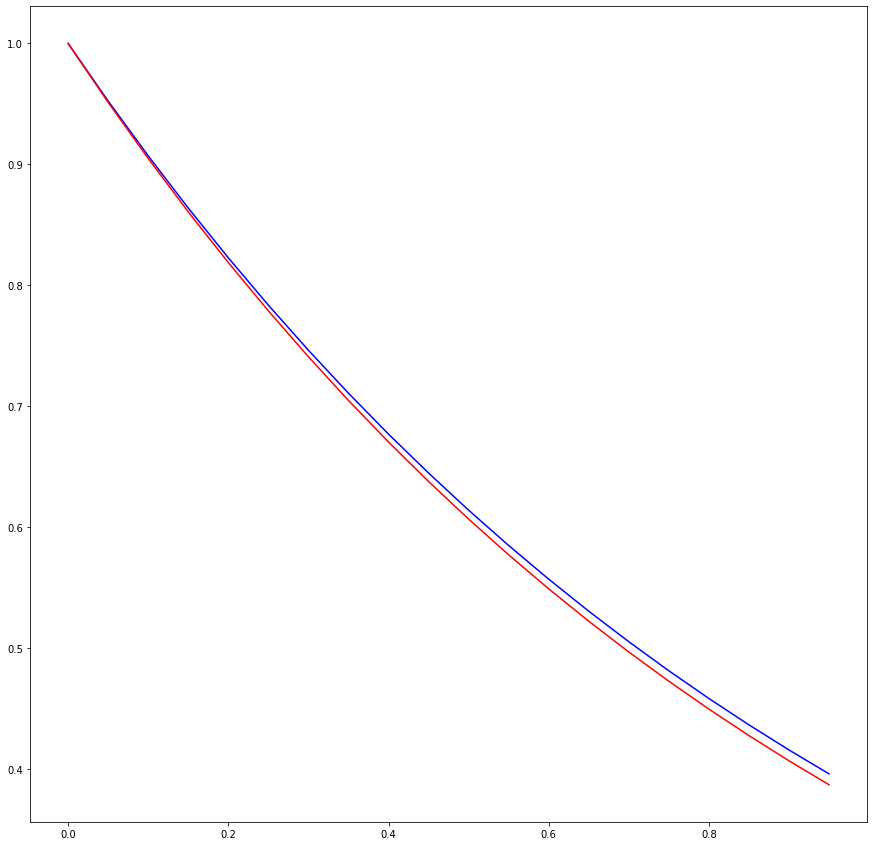

In [15]:
# Solve equation using explicit scheme
time_array, points_array_implicit_sample = solve_euler_implicit(f=sample_f, x0=1, dt=0.05, t0=0, tf=1)  # compute ~20 points

# Compare both solutions
plt.figure(figsize=(15,15))
plt.plot(time_array, points_array_implicit_sample, c='blue')  # solution computed using scheme
plt.plot(time_array, points_array_theory_sample, c='red')  # mathematical solution
plt.show()

### 8.4. Différence entre les méthodes explicite et implicite

Sur le graphe ci-dessous est représentée la différence entre les solutions calculées à l'aide des méthodes d'Euler explicite et implicite.

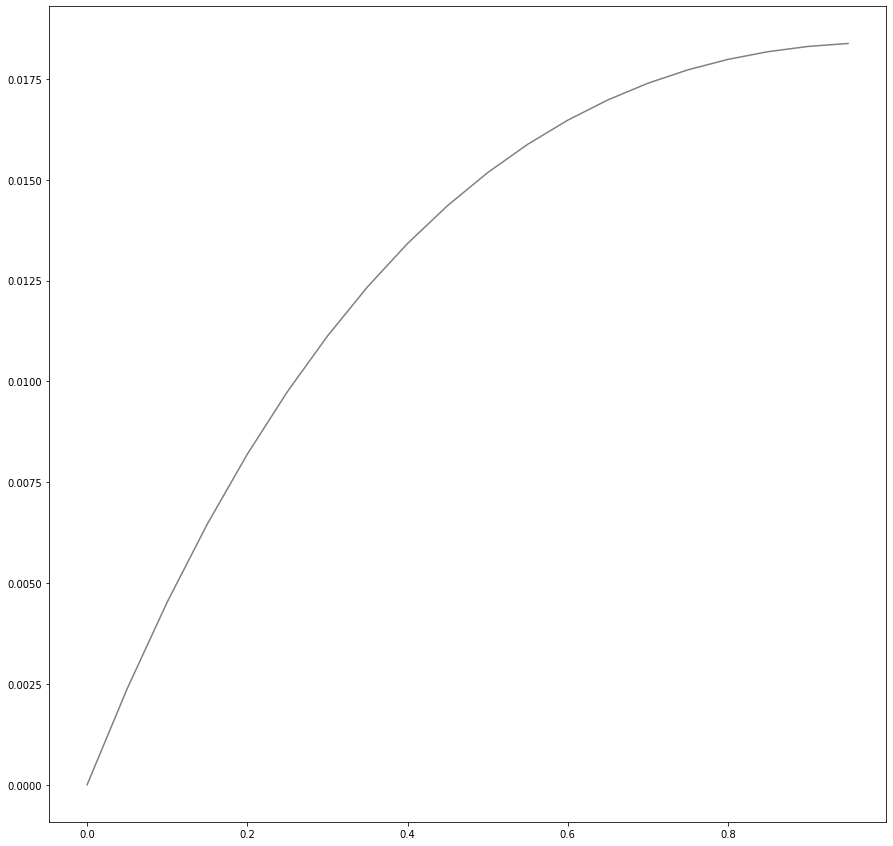

In [16]:
# Compute difference array
diff_array_full = np.abs(points_array_implicit_sample - points_array_explicit_sample)

# Plot difference array
plt.figure(figsize=(15,15))
plt.plot(time_array, diff_array_full, c='grey')
plt.show()

### 8.5. Test sur les équations de Lotka-Volterra

Sur les graphes ci-dessous sont représentés :
* Le nombre de proies, en bleu
* Le nombre de prédateurs, en rouge

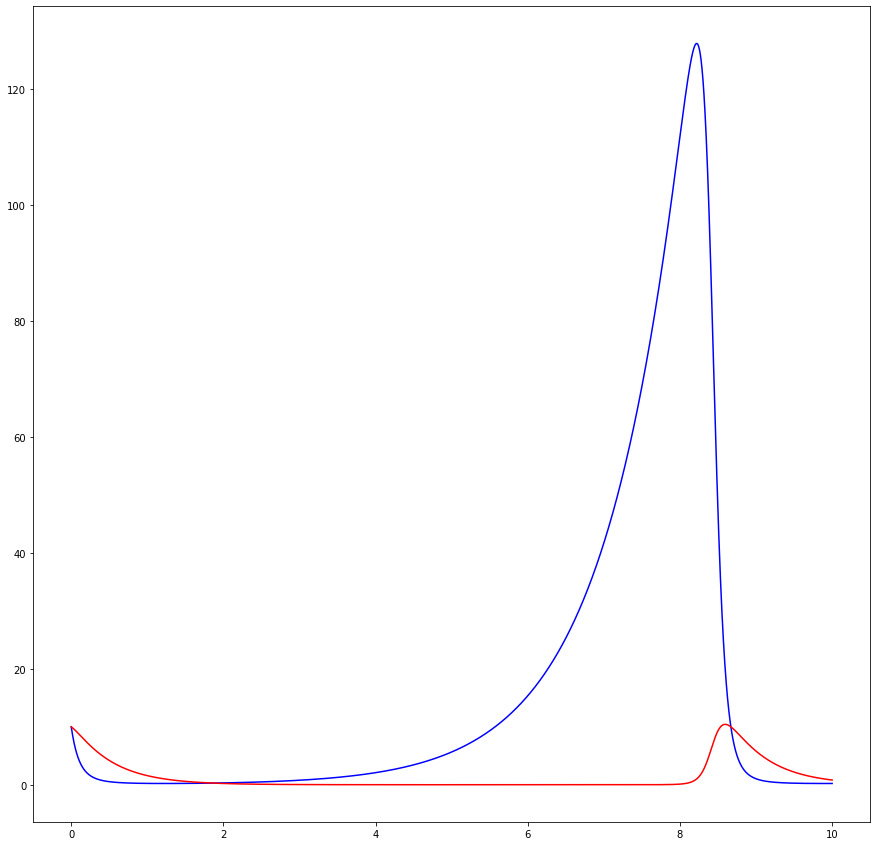

In [17]:
# Initialise simulation parameters
alpha = 1
beta = 1
delta = 0.1
gamma = 2

# Define derivative function
def lv(t, X):
    x1, x2 = X
    x1_der = alpha * x1 - beta * x1 * x2
    x2_der = delta * x1 * x2 - gamma * x2
    return np.array([x1_der, x2_der])

# Initialise function values
x10 = 10
x20 = 10
X0 = np.array([x10, x20])


# Solve equation using implicit scheme
time_array, points_array = solve_euler_implicit(f=lv, x0=X0, dt=0.0001, t0=0, tf=10)

# Unpack solution
x1_array = points_array[:, 0]
x2_array = points_array[:, 1]

# Plot solution
plt.figure(figsize=(15,15))
plt.plot(time_array, x1_array, c='blue')  # prey
plt.plot(time_array, x2_array, c='red')  # predators
plt.show()

En temps long, la simulation semble 'mieux' se comporter.

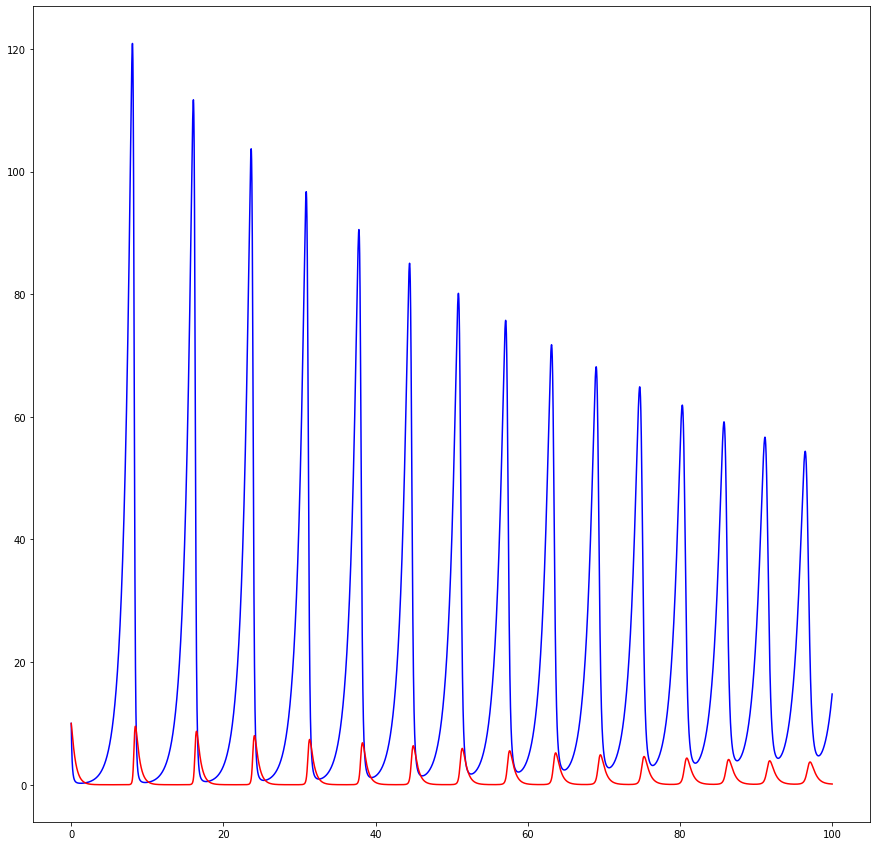

In [18]:
# Initialise simulation parameters
alpha = 1
beta = 1
delta = 0.1
gamma = 2

# Define derivative function
def lv(t, X):
    x1, x2 = X
    x1_der = alpha * x1 - beta * x1 * x2
    x2_der = delta * x1 * x2 - gamma * x2
    return np.array([x1_der, x2_der])

# Initialise function values
x10 = 10
x20 = 10
X0 = np.array([x10, x20])


# Solve equation using implicit scheme
time_array, points_array = solve_euler_implicit(f=lv, x0=X0, dt=0.01, t0=0, tf=100)

# Unpack solution
x1_array = points_array[:, 0]
x2_array = points_array[:, 1]

# Plot solution
plt.figure(figsize=(15,15))
plt.plot(time_array, x1_array, c='blue')  # prey
plt.plot(time_array, x2_array, c='red')  # predators
plt.show()

<br><br>

On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.

## Question 9


Expliquer pourquoi les solutions de
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{matrix} \right.
$$

sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$.

Pour montrer que les solutions de ces nouvelles équations ont les mêmes solutions que les originales on va procéder par une inclusion directe puis exploiter l'unicité de ces dernières.

En effet, soit $x(t) = (x_1(t), x_2(t))$ une solution des équations de Lotka-Volterra pour les conditions initiales $(t_0, x_0) \in \mathbb{R} \times (\mathbb{R}_{>0})^2$ et $u : \mathbb{R}^2 \longrightarrow \mathbb{R}^2$.
On a vu en question 4 que la quantité $H$ est conservée et que $x(t)$ est correctement définie pour tout $t \in \mathbb{R}$. De ce fait : $\forall t \in \mathbb{R}, H(x(t)) = H(x(0)) = a \in \mathbb{R}$ donc $H(x(t)) - H_0 = 0$

Dès lors :

$$
\left \{ \begin{matrix}
\dot{x_1} &=& x_1 (\alpha - \beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0)&=& x_1 (\alpha - \beta x_2)\\
\dot{x_2} &=& x_2 (\gamma - \delta x_2) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)&=& x_2 (\gamma - \delta x_2)
\end{matrix} \right.
$$

On retrouve les équations de Lokta-Volterra et on sait d'ores et déjà que $x(t)$ en est une solution. Ainsi, les solutions des équations originales sont aussi solutions des nouvelles équations.

Pour montrer l'égalité on reprend la solution $x(t)$ pour les conditions initiales $(t_0, x_0) \in \mathbb{R} \times (\mathbb{R}_{>0})^2$. Cette fonction est une solution des nouvelles équations comme on a pu le voir auparavant. Toutefois on remarque que :

$$
\begin{matrix}
f_\mathrm{nouv} & : & \mathbb{R}_{>0} \times \mathbb{R}_{>0} & \longrightarrow & \mathbb{R} \times \mathbb{R} \\
         &   & (x_1, x_2) & \longmapsto & 
         \left \{ \begin{matrix}
x_1 (\alpha - \beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0) \\
x_2 (\gamma - \delta x_2) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)
\end{matrix} \right.
\end{matrix}
$$

Cette fonction est continûment différentiable sur son domaine de définition (notamment car $H$ l'est aussi). De ce fait, les conditions sont réunies pour appliquer le théorème de Cauchy-Lipschitz. Et alors, notre solution candidate $x(t)$ des nouvelles équations devient l'unique solution pour les conditions initiales annoncées.

Ce raisonnement étant valable pour toutes les solutions, on peut donc affirmer que les deux jeux d'équations (originales et nouvelles) ont les mêmes solutions.

<br><br>

## Question 10


Soit $H_0\in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que
$$
\frac{\mathrm{d}}{\mathrm{d}t} \left( H(x(t))-H_0 \right) = -k \| \nabla H(x(t)) \|^2 \left( H(x(t))-H_0 \right) \ .
$$ 
En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

On pose $G = H - H_0$. Soit $x$ une solution des équations différentielles et $t \in \mathbb{R}$ :

$$
\begin{matrix}
\frac{\mathrm{d}G}{\mathrm{d}t}(x_1, x_2) &=&    \frac{\mathrm{d}H}{\mathrm{d}x_1}(x_1, x_2) \frac{\mathrm{d}x_1}{\mathrm{d}t} + 
                                    \frac{\mathrm{d}H}{\mathrm{d}x_2}(x_1, x_2) \frac{\mathrm{d}x_2}{\mathrm{d}t}\\
                        &=&    - \left[(\delta - \frac{\gamma}{x_1})u_1(x_1, x_2) + (\beta - \frac{\alpha}{x_2})u_2(x_1, x_2)\right](H(x_1, x_2) - H_0)\\
                        &=&    - \left[ (\delta - \frac{\gamma}{x_1})u_1(x_1, x_2) + (\beta - \frac{\alpha}{x_2})u_2(x_1, x_2)\right]G(x_1, x_2)
                             \end{matrix}
$$
                             
Or on sait que $\left\| \nabla{H(x_1, x_2)} \right\|^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$

Donc il suffit de choisir :

$$
\begin{matrix} u &:& \mathbb{R}^2 &\longrightarrow& \mathbb{R}^2 \\
                                               && (x_1, x_2) &\longmapsto& \left( k(\delta - \frac{\gamma}{x_1}), k(\beta - \frac{\alpha}{x_2}) \right) \end{matrix}
$$
                                               
Pour avoir : 

$$
\frac{d}{dt} \big( H(x(t)) - H_0 \big) = -k \left\| \nabla{H}(x(t)) \right\|^2 \big( H(x(t)) - H_0 \big)
$$

Montrons maintenant la convergence exponentielle de $H(x(t))$ vers $H_0$ avec une telle fonction $u$ pour un $k$ strictement positif. Pour cela on garde la fonction $G$ introduite auparavant et on va tout d'abord chercher à minimiser $\left\| \nabla{H}(x(t)) \right\|^2$.

On a :
$$
\left\| \nabla{H}(x_1(t), x_2(t)) \right\|^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2
$$

<br>

C'est une somme de termes positifs donc la norme est nulle que si chacun des termes est nul, c'est-à-dire si $(x_1, x_2) = \bar{x}$. Ainsi, comme $x(t)$ est toujours à distance strictement positive de $\bar{x}$ on peut poser $h_0 \in \mathbb{R_{>0}}$ tel que : $\forall t \in \mathbb{R}, \ \left\| \nabla{H}(x(t)) \right\|^2 > h_0^2$.

On suppose que $G$ est toujours positive (on montrera après qu'elle ne peut pas changer de signe) alors on obtient l'inégalité suivante : 
$$
\forall t \in \mathbb{R}, \ \frac{\mathrm{d}G}{\mathrm{d}t}(t) \leq -kh_0^2G(t)
\quad \Leftrightarrow \quad
\forall t \in \mathbb{R}, \ \frac{\mathrm{d}G}{\mathrm{d}t}(t) + kh_0^2G(t) \leq 0
$$

On pose alors pour tout $t \in \mathbb{R}$ :
$$
A(t) = \frac{\mathrm{d}G}{\mathrm{d}t}(t) + kh_0^2G(t)
$$

<br>

Dès lors, la solution de cette équation est de la forme : $G(t) = e^{-kh_0^2t} \left( C + \int_{0}^{t} A(u)e^{kh_0^2u}\mathrm{d}u \right)$ avec $C$ une constante positive car $G(0) = C \geq 0$ (hypothèse). Or $\int_{0}^{t} A(u)e^{kh_0^2u}\mathrm{d}u \leq 0$ car $A$ est négative. Ainsi on obtient la décroissance exponentielle :
$$
\forall t \in \mathbb{R}, \ 0 \leq G(t) \leq Ce^{-kh_0^2t}
$$

Si $G$ est toujours négative alors il suffit de changer les symboles d'inégalité et donc on obtient, avec $C = G(0) \leq 0$ une constante négative :
$$
\forall t \in \mathbb{R}, \ 0 \geq G(t) \geq Ce^{-kh_0^2t}
$$

Montrons dorénavant que $G$ ne peut pas changer de signe. Pour cela on utilise le même argument d'unicité que dans la question 3. En effet, on remarque que $G = 0$ est solution donc, comme $G$ est continue, si elle changeait de signe elle couperait forcément l'axe des abscisses et s'annulerait. Dès lors, elle croise la solution nulle ce qui n'est pas possible d'après le théorème de Cauchy-Lipschiz.

In fine, on a bien réussi à montrer la convergence exponentielle de $H$ vers $H_0$.

<br><br>

## Question 11


En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?

Grâce au résultat précédent, on peut réussir à obtenir une quasi-conservation de la quantité $H$ durant la simulation. Ainsi, il suffit d'implémenter les nouvelles équations au lieu du système de Lokta-Volterra avec la fonction $u$ correspondante pour assurer cette stabilité.

Le facteur $k$ caractérise alors l'inverse de la durée caractéristique de convergence exponentielle, c'est pourquoi à première vue il serait intéressant de le prendre le plus grand possible. 

Toutefois, on remarque que losrque l'on va appliquer le schéma :
$$
G(x^{j+1}) = G(x^j) + \frac{\mathrm{d}G}{\mathrm{d}t}(x^j)\mathrm{d}t + \mathrm{o}(\mathrm{d}t)
$$

En réutilisant la relation trouvée plus haut :
$$
G(x^{j+1}) = (1 - k \left\| \nabla{H}(x^j) \right\|^2 \mathrm{d}t)G(x^{j}) + \mathrm{o}(\mathrm{d}t)
$$

Donc en passant à la valeur absolue :
$$
|G(x^{j+1})| = \bigg| 1 - k \left\| \nabla{H}(x^j) \right\|^2 \mathrm{d}t \bigg| \cdot \big| G(x^{j}) \big|  + \mathrm{o}(\mathrm{d}t)
$$

Ainsi, comme le choix de $\mathrm{d}t$ est limité par les erreurs d'approximation numérique, si on prend $k$ trop grand le permier facteur va devenir supérieur strictement à 1. Dès lors, notre schéma va exploser donc on ne peut pas prendre $k$ aussi grand que l'on souhaite.